<a href="https://colab.research.google.com/github/Mayank-004/VC-Industry-Predictive-analysis/blob/main/VC_Target_annualized_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [478]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
random.seed(786)


## Importing the dataset







In [479]:
url1 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VC_Exits.csv'
dataset1 = pd.read_csv(url1, error_bad_lines=False)

#url2 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCExit2.csv'
#dataset2 = pd.read_csv(url2, error_bad_lines=False)

url3 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCData2.csv'
dataset3 = pd.read_csv(url3, error_bad_lines=False)

dataset = pd.merge(dataset1,dataset3,left_on=["Company PBID"],right_on=["Company ID"])



dataset


,Company PBID,Exit Date,Exit Size (millions),Pre Value (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,Total Preferred Capital Raised ($M)*,% Preferred Capital Raised*,Total Preferred Capital Raised ($M) - Combination**,% Preferred Capital Raised - Combination**,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Announced Date,Deal Date,Deal Size,Deal Size Status,Pre-money Valuation,...,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Revenue Growth since last debt deal,Gross Profit,Net Income,EBITDA,EBIT,Total Debt (from financials),Fiscal Year,Valuation/EBITDA,Valuation/EBIT,Valuation/Net Income,Valuation/Revenue,Valuation/Cash Flow,Deal Size/EBITDA,Deal Size/EBIT,Deal Size/Net Income,Deal Size/Revenue,Deal Size/Cash Flow,Debt/EBITDA,Debt/Equity,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,EBITDA Margin %,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
0,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,67911-49T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",1,67911-49T,NaN,01-Jan-2015,0.33,Actual,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
1,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,122433-04T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",2,122433-04T,NaN,26-May-2015,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
2,160695-55,1/13/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,$0.70,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Software Development Applications,"SaaS, TMT, CloudTech & DevOps",Tel Aviv,NaN,Israel,71323-57T,160695-55,Information Technology,Software,Software Development Applications,"Application Software, Software Development App...","CloudTech & DevOps, SaaS, TMT","a/b testing, application development, applicat...",Formerly VC-backed,Generating Revenue,Venture Capital,56786-14P,"BA (Bachelor of Arts), 2005, Business & Marketing",1,71323-57T,NaN,18-Mar-2016,0.70,Actual,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,US Dollars (USD),"Tel Aviv, Israel",Middle East,Middle East,Tel Aviv,NaN,NaN,Israel,2015.0
3,81857-08,3/18/19,$166.00,NaN,$166.00,Merger/Acquisition,Early Stage VC,$10.10,NaN,NaN,NaN,NaN,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035

In [480]:
dataset.describe()

,Deal No.,Deal Size,Total Invested Equity,Debt Type 3,Debt Amount 1,Debt Amount 2,Debt Amount 3,Debt Raised in Round,Contingent Payout,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Total Debt (from financials),Fiscal Year,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,Year Founded
count,305.000000,244.000000,229.000000,0.0,12.000000,1.0,0.0,12.000000,0.0,267.000000,246.000000,140.000000,0.0,81.000000,37.000000,91.000000,0.0,0.0,0.0,0.0,0.0,300.000000
mean,4.072131,38.641844,39.056201,NaN,23.090833,5.0,NaN,23.507500,NaN,3.883895,2.605691,2.792857,NaN,98.809877,22.639730,2016.274725,NaN,NaN,NaN,NaN,NaN,2011.023333
std,2.399570,84.661816,83.502049,NaN,57.814106,NaN,NaN,57.666114,NaN,3.423383,2.421630,1.867929,NaN,161.597687,64.688232,1.686982,NaN,NaN,NaN,NaN,NaN,3.928643
min,1.000000,0.030000,0.020000,NaN,0.040000,5.0,NaN,0.040000,NaN,1.000000,1.000000,1.000000,NaN,0.020000,0.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,1997.000000
25%,2.000000,2.000000,2.500000,NaN,0.212500,5.0,NaN,0.212500,NaN,1.000000,1.000000,1.000000,NaN,6.730000,0.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,2009.000000
50%,4.000000,8.400000,10.000000,NaN,1.500000,5.0,NaN,2.090000,NaN,3.000000,2.000000,2.000000,NaN,32.460000,0.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,2012.000000
75%,5.000000,30.775000,31.000000,NaN,6.250000,5.0,NaN,7.750000,NaN,5.000000,3.000000,4.000000,NaN,100.000000,5.020000,2018.000000,NaN,NaN,NaN,NaN,NaN,2014.000000
max,14.000000,720.000000,720.000000,NaN,200.000000,5.0,NaN,200.000000,NaN,22.000000,16.000000,8.000000,NaN,844.800000,257.200000,2021.000000,NaN,NaN,NaN,NaN,NaN,2017.000000


Filling missing values of Target column annualized return

In [481]:
# target column annualized_return is derived by Exit Size divided by Total VC capital raised and Total duration of Company
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace("$","") # removing $ from Total VC capital
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace(",","") # removing "," from Total VC capital
dataset.loc[:,'Total VC Capital Raised ($M)***'] = dataset.loc[:,'Total VC Capital Raised ($M)***'].astype(float) # converting Total VC capital to float from string
dataset['Total VC Capital Raised ($M)***']
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace("$","") # removing $ from Exit Size
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace(",","") # removing "," from Exit Size
dataset.loc[:,'Exit Size (millions)'] = dataset.loc[:,'Exit Size (millions)'].astype(float) # converting Total VC capital to float from string



In [482]:
# calculating total working duration of company


from datetime import date 
todays_date = date.today() 

ts =todays_date.year

dataset['Total duration for Company'] = ts - dataset['Year Founded']

dataset=dataset.drop(columns=['Year Founded'])

dataset['Total duration for Company'] 

0       7.0
1       7.0
2       6.0
3       8.0
4       5.0
       ... 
300    20.0
301    20.0
302    13.0
303    10.0
304    10.0
Name: Total duration for Company, Length: 305, dtype: float64

Deriving Target Column 'annualized_return'

In [483]:
dataset['annualized_return'] = (((1 + (dataset['Exit Size (millions)']-dataset['Total VC Capital Raised ($M)***']))**(1/dataset['Total duration for Company']))-1).astype(float)

In [484]:
dataset['annualized_return']

0           NaN
1           NaN
2           NaN
3      0.881278
4           NaN
         ...   
300         NaN
301         NaN
302         NaN
303    1.477530
304    1.477530
Name: annualized_return, Length: 305, dtype: float64

Drop Missing values from Target column

In [485]:
dataset.dropna(subset = ["annualized_return"], inplace=True) # Drop rows with no values from Target column

In [486]:
dataset.count()

Company PBID                  135
Exit Date                     135
Exit Size (millions)          135
Pre Value (millions)           54
Post Value (millions)         133
                             ... 
Company State/Province        105
Company Post Code             125
Company Country               135
Total duration for Company    135
annualized_return             135
Length: 106, dtype: int64

In [487]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]



,Total,Percent
Deal Type 3,135,100.000000
Implied EV/Net Income,135,100.000000
Debt Amount 3,135,100.000000
Debt Type 2,135,100.000000
Debt Amount 2,135,100.000000
...,...,...
VC Round,13,9.629630
Company Post Code,10,7.407407
Raised to Date,8,5.925926
CEO PBId,5,3.703704


Drop Column which has missing values more than 30%

In [488]:
missing_df = missing_df.reset_index()
over30 = list(missing_df.loc[missing_df['Percent'] >= 30,'index'])
dataset = dataset.drop(over30, axis = 1)


In [489]:
dataset

,Company PBID,Exit Date,Exit Size (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Deal Date,Deal Size,Deal Size Status,Raised to Date,VC Round,Deal Type,Deal Type 2,Deal Class,Total Invested Equity,Deal Status,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Total duration for Company,annualized_return
3,81857-08,3/18/19,166.00,$166.00,Merger/Acquisition,Early Stage VC,10.10,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035-10T,81857-08,Information Technology,Software,Business/Productivity Software,"Business/Productivity Software*, Social/Platfo...","CloudTech & DevOps, SaaS","agile management, data sync, enterprise softwa...",Formerly VC-backed,Generating Revenue,Venture Capital,93804-31P,"BS (Bachelor of Science), 1996, Computer Scien...",1,46035-10T,19-Feb-2015,10.10,Actual,10.10,1st Round,Early Stage VC,NaN,Venture Capital,10.10,Completed,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),"Georgetown, TX",Americas,North America,Georgetown,Texas,78626,United States,8.0,0.881278
11,62307-28,5/10/19,16.00,$16.00,Merger/Acquisition,Early Stage VC,3.75,NaN,Information Technology,Software,Database Software,"SaaS, Mobile, Big Data, TMT, CloudTech & DevOps",Seattle,Washington,United States,133659-10T,62307-28,Information Technology,Software,Database Software,"Database Software*, Media and Information Serv...","Big Data, CloudTech & DevOps, Mobile, SaaS, TMT","data collection, geospatial technology, locati...",Formerly VC-backed,Generating Revenue,Venture Capital,79257-70P,"BS (Bachelor of Science), 2002, Computer Science",6,133659-10T,24-Sep-2018,3.00,Actual,3.77,3rd Round,Early Stage VC,NaN,Venture Capital,3.00,Completed,Generating Revenue,Venture Capital-Backed,NaN,NaN,11,US Dollars (USD),"Seattle, WA",Americas,North America,Seattle,Washington,98105,United States,8.0,0.381265
17,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,69003-46T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,"Diploma, 1992, Computer Engineering; Universit...",1,69003-46T,09-Sep-2016,3.30,Actual,3.30,1st Round,Seed Round,Seed Round,Venture Capital,3.30,Completed,Stealth,Venture Capital-Backed,3.0,3.0,NaN,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,California,95113,United States,6.0,1.179884
18,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,87814-00T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,"Diploma, 1992, Computer Engineering; Universit...",2,87814-00T,18-Apr-2017,14.50,Actual,17.80,2nd Round,Early Stage VC,Series A,Venture Capital,14.50,Completed,Generating Revenue,Venture Capital-Backed,2.0,1.0,NaN,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,California,95113,United States,6.0,1.179884
19,

In [490]:
# Drop duplicate columns  

dataset=dataset.drop(columns=['Deal ID','Company ID','Primary Industry Sector','Primary Industry Group','Primary Industry Code','All Industries','Verticals_y','HQ Location','HQ Global Region','HQ Global Sub Region','Company City',	'Company State/Province',	'Company Post Code',	'Company Country'])




In [491]:
# Drop Column intuitively which may not have significant impact
dataset=dataset.drop(columns=['Company PBID','Exit Date','Exit Size (millions)','Post Value (millions)','Total VC Capital Raised ($M)***','Keywords','Deal No.','Deal ID.1','Deal Date','Deal Size Status','Deal Type 2','Deal Class','Deal Status','CEO PBId','Native Currency of Deal','MOIC'])





In [492]:
dataset

,Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Total duration for Company,annualized_return
3,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,Early Stage VC,10.10,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,8.0,0.881278
11,Merger/Acquisition,Early Stage VC,Information Technology,Software,Database Software,"SaaS, Mobile, Big Data, TMT, CloudTech & DevOps",Seattle,Washington,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 2002, Computer Science",3.00,3.77,3rd Round,Early Stage VC,3.00,Generating Revenue,Venture Capital-Backed,NaN,NaN,11,8.0,0.381265
17,Merger/Acquisition,Series B,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.30,3.30,1st Round,Seed Round,3.30,Stealth,Venture Capital-Backed,3.0,3.0,NaN,6.0,1.179884
18,Merger/Acquisition,Series B,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.50,17.80,2nd Round,Early Stage VC,14.50,Generating Revenue,Venture Capital-Backed,2.0,1.0,NaN,6.0,1.179884
19,Merger/Acquisition,Series B,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,NaN,20.00,37.80,3rd Round,Early Stage VC,20.00,Generating Revenue,Venture Capital-Backed,5.0,3.0,NaN,6.0,1.179884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,IPO,Later Stage VC,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",400.00,404.00,4th Round,Later Stage VC,200.00,Generating Revenue,Venture Capital-Backed,6.0,4.0,"3,719",17.0,0.733238
295,IPO,Later Stage VC,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",181.00,204.00,3rd Round,Later Stage VC,181.00,Generating Revenue,Venture Capital-Backed,7.0,5.0,"3,719",17.0,0.733238
296,IPO,Later Stage VC,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",NaN,699.00,7th Round,Later Stage VC,NaN,Generating Revenue,Venture Capital-Backed,9.0,7.0,"3,719",17.0,0.733238
303,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,Later Stage VC,114.97,Generating Revenue,Venture Capital-Backed,8.0,4.0,"3,871",10.0,1.477530


In [493]:
# adding investors and new investors column together

dataset['# Investors']= dataset['# Investors']+dataset['# New Investors']
dataset=dataset.drop(columns=['# New Investors'])

In [494]:
dataset['# Investors']

3       2.0
11      NaN
17      6.0
18      3.0
19      8.0
       ... 
294    10.0
295    12.0
296    16.0
303    12.0
304    14.0
Name: # Investors, Length: 135, dtype: float64

In [495]:
dataset

,Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Total duration for Company,annualized_return
3,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,Early Stage VC,10.10,Generating Revenue,Venture Capital-Backed,2.0,6,8.0,0.881278
11,Merger/Acquisition,Early Stage VC,Information Technology,Software,Database Software,"SaaS, Mobile, Big Data, TMT, CloudTech & DevOps",Seattle,Washington,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 2002, Computer Science",3.00,3.77,3rd Round,Early Stage VC,3.00,Generating Revenue,Venture Capital-Backed,NaN,11,8.0,0.381265
17,Merger/Acquisition,Series B,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.30,3.30,1st Round,Seed Round,3.30,Stealth,Venture Capital-Backed,6.0,NaN,6.0,1.179884
18,Merger/Acquisition,Series B,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.50,17.80,2nd Round,Early Stage VC,14.50,Generating Revenue,Venture Capital-Backed,3.0,NaN,6.0,1.179884
19,Merger/Acquisition,Series B,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,NaN,20.00,37.80,3rd Round,Early Stage VC,20.00,Generating Revenue,Venture Capital-Backed,8.0,NaN,6.0,1.179884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,IPO,Later Stage VC,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",400.00,404.00,4th Round,Later Stage VC,200.00,Generating Revenue,Venture Capital-Backed,10.0,"3,719",17.0,0.733238
295,IPO,Later Stage VC,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",181.00,204.00,3rd Round,Later Stage VC,181.00,Generating Revenue,Venture Capital-Backed,12.0,"3,719",17.0,0.733238
296,IPO,Later Stage VC,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",NaN,699.00,7th Round,Later Stage VC,NaN,Generating Revenue,Venture Capital-Backed,16.0,"3,719",17.0,0.733238
303,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,Later Stage VC,114.97,Generating Revenue,Venture Capital-Backed,12.0,"3,871",10.0,1.477530


**Cleaning column Values to Numerical only ( removing $,x)**

## Filling Missing Values

In [496]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
State,30,22.222222
Total Invested Equity,29,21.481481
CEO Education,27,20.000000
# Investors,24,17.777778
Deal Size,24,17.777778
Current Employees,16,11.851852
VC Round,13,9.629630
Raised to Date,8,5.925926


In [497]:
# filling dataset missing values in columns State, CEO Education and VC round
dataset= dataset.fillna({
'State' : 'NOT IN USA' ,
'CEO Education': 'No Known Education',
'VC Round' : 'not known'
})


In [498]:
# filling Investors missing value by mean of other row values
dataset['# Investors'] = dataset['# Investors'].fillna((dataset['# Investors'].mean()))


In [499]:
# filling missing values in Raised to date column with mean 

dataset['Raised to Date']= dataset['Raised to Date'].str.replace(",","")

dataset.loc[:,'Raised to Date'] = dataset.loc[:,'Raised to Date'].astype(float)

dataset['Raised to Date'] = dataset['Raised to Date'].fillna((dataset['Raised to Date'].mean()))


In [500]:
# filling missing values in Total duration for Company column with mean 

dataset['Total duration for Company'] = dataset['Total duration for Company'].fillna((dataset['Total duration for Company'].mean()))

In [501]:
# filling missing values in Raised to date column with mean 

dataset['Current Employees']= dataset['Current Employees'].str.replace(",","")
dataset.loc[:,'Current Employees'] = dataset.loc[:,'Current Employees'].astype(float)

dataset['Current Employees'] = dataset['Current Employees'].fillna((dataset['Current Employees'].mean()))

In [502]:
# filling missing values in all other columns with mean 

dataset = dataset.fillna((dataset.mean()))


In [503]:
dataset['VC Round']

3      1st Round
11     3rd Round
17     1st Round
18     2nd Round
19     3rd Round
         ...    
294    4th Round
295    3rd Round
296    7th Round
303    5th Round
304    4th Round
Name: VC Round, Length: 135, dtype: object

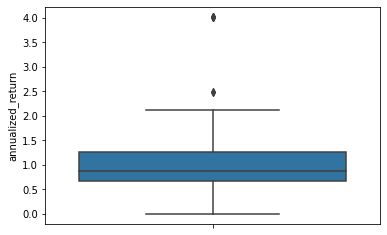

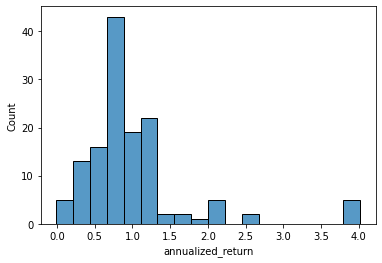

[Text(0, 0, 'Generating Revenue'),
 Text(0, 0, 'Stealth'),
 Text(0, 0, 'Product In Beta Test'),
 Text(0, 0, 'Generating Revenue/Not Profitable'),
 Text(0, 0, 'Startup'),
 Text(0, 0, 'Profitable')]

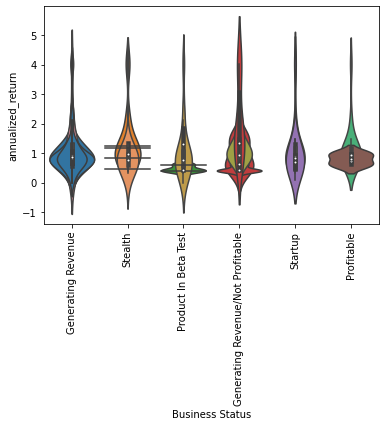

In [504]:
# check annualized_returns's distribution
import seaborn as sn

sn.boxplot(y=dataset["annualized_return"])
plt.show()
sn.histplot(dataset, x ='annualized_return')
plt.show()


# check the relationship between MOIC and Primary Industry Sector
v1 = sn.violinplot(x="Industry Sector", y="annualized_return", data=dataset, size=6)
v1.set_xticklabels(v1.get_xticklabels(),rotation=90)

#Primary Industry Sector can be encoded into 2 types

# check the relationship between MOIC and Current Financing Status
v2 = sn.violinplot(x="Current Financing Status", y="annualized_return", data=dataset, size=6)
v2.set_xticklabels(v2.get_xticklabels(),rotation=90)

#Current Financing Status can be encoded into 4 types

# check the relationship between MOIC and Current Business Status
v3 = sn.violinplot(x="Current Business Status", y="annualized_return", data=dataset, size=6)
v3.set_xticklabels(v3.get_xticklabels(),rotation=90)

# Current Business Status can be encoded into 2 types

# check the relationship between MOIC and Universe
v4 = sn.violinplot(x="Universe", y="annualized_return", data=dataset, size=6)
v4.set_xticklabels(v4.get_xticklabels(),rotation=90)

#Universe can be encoded into 4 types

# check the relationship between MOIC and VC Round
v5 = sn.violinplot(x="VC Round", y="annualized_return", data=dataset, size=6)
v5.set_xticklabels(v5.get_xticklabels(),rotation=90)

# VC Round Status can be encoded into 2 types

# check the relationship between MOIC and Business Status
v7 = sn.violinplot(x="Business Status", y="annualized_return", data=dataset, size=6)
v7.set_xticklabels(v7.get_xticklabels(),rotation=90)

#Business Status can be encoded into 3 types



## Encoding categorical data

Label Encoding of Categorical Variable

In [505]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


dataset[['Exit Type']] = le.fit_transform(dataset[['Exit Type']].astype(str))

dataset[['Last VC Deal Type']] = le.fit_transform(dataset[['Last VC Deal Type']].astype(str))

dataset[['Industry Sector']] = le.fit_transform(dataset[['Industry Sector']].astype(str))

dataset[['Industry Group']] = le.fit_transform(dataset[['Industry Group']].astype(str))

dataset[['Industry Code']] = le.fit_transform(dataset[['Industry Code']].astype(str))

dataset[['Verticals_x']] = le.fit_transform(dataset[['Verticals_x']].astype(str))

dataset[['City']] = le.fit_transform(dataset[['City']].astype(str))

dataset[['State']] = le.fit_transform(dataset[['State']].astype(str))
dataset[['Deal Type']] = le.fit_transform(dataset[['Deal Type']].astype(str))

dataset[['Country']] = le.fit_transform(dataset[['Country']].astype(str))
dataset[['Current Financing Status']] = le.fit_transform(dataset[['Current Financing Status']].astype(str))
dataset[['Current Business Status']] = le.fit_transform(dataset[['Current Business Status']].astype(str))
dataset[['Universe']] = le.fit_transform(dataset[['Universe']].astype(str))
dataset[['CEO Education']] = le.fit_transform(dataset[['CEO Education']].astype(str))
dataset[['VC Round']] = le.fit_transform(dataset[['VC Round']].astype(str))
dataset[['Business Status']] = le.fit_transform(dataset[['Business Status']].astype(str))
dataset[['Financing Status']] = le.fit_transform(dataset[['Financing Status']].astype(str))


dataset

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Total duration for Company,annualized_return
3,2,1,1,4,2,16,9,8,8,0,0,8,5,10.100000,10.10,2,2,10.100000,0,4,2.000000,6.000000,8.0,0.881278
11,2,1,1,4,4,20,22,9,8,0,0,8,6,3.000000,3.77,4,2,3.000000,0,4,7.594595,11.000000,8.0,0.381265
17,2,6,1,4,11,1,19,0,8,0,0,8,14,3.300000,3.30,2,6,3.300000,5,4,6.000000,1047.504202,6.0,1.179884
18,2,6,1,4,11,1,19,0,8,0,0,8,14,14.500000,17.80,3,2,14.500000,0,4,3.000000,1047.504202,6.0,1.179884
19,2,6,1,4,11,1,19,0,8,0,0,8,29,20.000000,37.80,4,2,20.000000,0,4,8.000000,1047.504202,6.0,1.179884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,2,1,4,6,28,18,0,8,0,1,4,42,400.000000,404.00,5,5,200.000000,0,4,10.000000,3719.000000,17.0,0.733238
295,1,2,1,4,6,28,18,0,8,0,1,4,42,181.000000,204.00,4,5,181.000000,0,4,12.000000,3719.000000,17.0,0.733238
296,1,2,1,4,6,28,18,0,8,0,1,4,42,69.372793,699.00,8,5,68.865189,0,4,16.000000,3719.000000,17.0,0.733238
303,1,9,1,4,3,21,19,0,8,0,2,7,29,114.970000,160.75,6,5,114.970000,0,4,12.000000,3871.000000,10.0,1.477530


Changing Data type of Column to perform correlation matrix

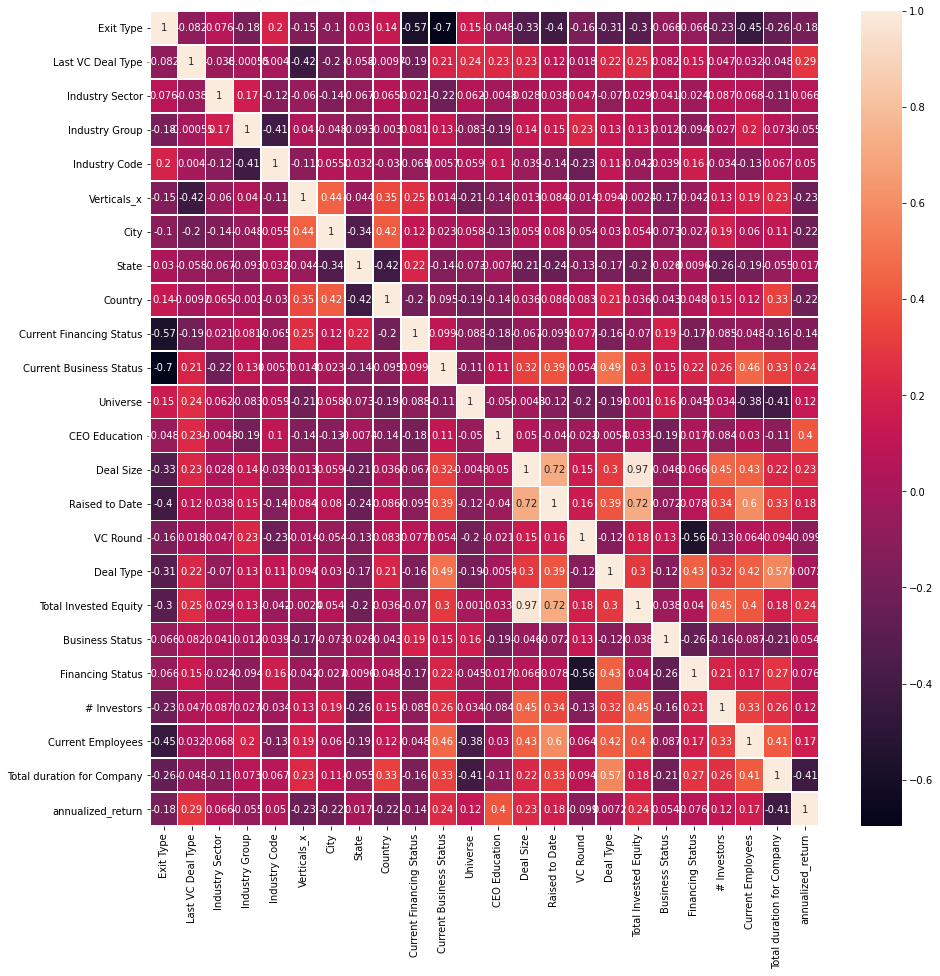

In [506]:

corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

Removal of The columns which are highly related to other columns

In [507]:
dataset=dataset.drop(columns=['Deal Size','Deal Type'])

In [508]:
dataset=dataset.drop(columns=['Total duration for Company'])

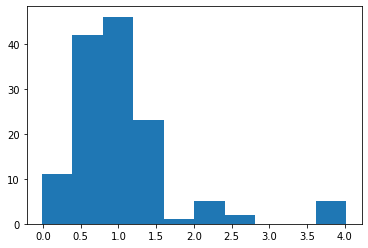

In [509]:
# histogram plot
from matplotlib import pyplot

pyplot.hist(dataset['annualized_return'])
pyplot.show()

In [510]:
X = dataset.loc[:,dataset.columns!='annualized_return']
Y = dataset['annualized_return']

## Splitting the dataset into the Training set and Test set

In [511]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 786)

In [512]:
print(y_train)

40     0.724604
212    0.532099
101    0.916303
294    0.733238
267    0.827751
         ...   
211    0.532099
47     0.568574
245    0.592162
253    0.341168
76     0.686081
Name: annualized_return, Length: 94, dtype: float64


In [513]:
print(X_train)

     Exit Type  Last VC Deal Type  ...  # Investors  Current Employees
40           2                  8  ...     7.594595        1047.504202
212          2                  2  ...     2.000000        1600.000000
101          2                  6  ...     7.594595         421.000000
294          1                  2  ...    10.000000        3719.000000
267          1                  9  ...    11.000000         669.000000
..         ...                ...  ...          ...                ...
211          2                  2  ...     4.000000        1600.000000
47           2                  2  ...    17.000000         390.000000
245          1                 12  ...    12.000000        1813.000000
253          1                  7  ...     5.000000         123.000000
76           2                  2  ...     8.000000        1000.000000

[94 rows x 20 columns]


In [514]:
print(X_test)

     Exit Type  Last VC Deal Type  ...  # Investors  Current Employees
24           2                  4  ...     7.594595          11.000000
166          2                  6  ...     4.000000        1047.504202
226          2                  6  ...     5.000000          28.000000
89           2                  9  ...     9.000000         300.000000
248          2                  4  ...     7.000000          11.000000
108          2                  6  ...     9.000000         130.000000
263          1                  2  ...    13.000000        6160.000000
290          1                 13  ...    12.000000         710.000000
32           1                  2  ...    12.000000        1117.000000
238          1                  7  ...     2.000000          75.000000
283          1                 13  ...    13.000000        2189.000000
281          1                 13  ...    14.000000        2189.000000
205          1                 10  ...     4.000000        2009.000000
249   

Defining Function for Model Performance evaluation

### Building Models

In [515]:
def eval_result(y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error

    rmse_train = mean_squared_error(y_train, y_predtrain, squared=False)
    print( f"RMSE Train error is {rmse_train}")
    rmse_test = mean_squared_error(y_test, y_predtest, squared=False)
    print( f"RMSE Test error is {rmse_test}")
    
    mae_train= mean_absolute_error(y_train, y_predtrain)
    print( f"MAE Train error is {mae_train}")
    mae_test= mean_absolute_error(y_test, y_predtest)
    print( f"MAE Test error is {mae_test}")


   
    RRSE_train = np.sqrt(np.mean((np.square(y_train-y_predtrain))/(np.square(np.mean(y_train)-y_train))))
    print( f"Root relative squared Train error is {RRSE_train}")
    RRSE_test = np.sqrt(np.mean((np.square(y_test-y_predtest))/(np.square(np.mean(y_test)-y_test))))
    print( f"Root relative squared Test error is {RRSE_test}")

    pr1=pd.DataFrame(y_predtest,columns=["Pred"])

    pr1["Actual"]=y_test.values

    pr1['Percentage error']=((pr1['Actual']-pr1['Pred'])/pr1['Actual'])*100
    print(f"{pr1}")

   
  

Linear Regression

In [516]:
from sklearn.linear_model import LinearRegression
multlin_model = LinearRegression()
multlin_model.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting result

In [517]:
y_predtestlin= multlin_model.predict(X_test)

y_predtrainlin = multlin_model.predict(X_train)


In [518]:
np.mean(y_predtrainlin)

1.0761122889430705

evaluating model performance

In [519]:
eval_result(y_train,y_predtrainlin,y_test,y_predtestlin)

RMSE Train error is 0.6133913011265184
RMSE Test error is 0.6618274876658027
MAE Train error is 0.4791999138053934
MAE Test error is 0.5224427143143712
Root relative squared Train error is 1.9348783649340837
Root relative squared Test error is 149.49649446283635
        Pred    Actual  Percentage error
0   1.292735  0.595059       -117.244830
1   1.051483  2.489652         57.765876
2   0.883207  0.874627         -0.980906
3   0.438417  0.951366         53.917112
4   0.645532  0.685961          5.893757
5   0.939005  0.936805         -0.234830
6   0.770348  0.852689          9.656574
7   1.293725  0.944336        -36.998360
8   0.823011  0.880892          6.570749
9   1.114051  0.459026       -142.698527
10  0.668240  2.125256         68.557200
11  1.391350  2.125256         34.532589
12  1.924276  1.326385        -45.076741
13  0.198041  0.685961         71.129374
14  1.152072  0.733238        -57.121272
15  1.806339  0.724604       -149.286337
16  1.331010  0.651244       -104.379545

Ridge Regression

---



In [520]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from numpy import absolute
from numpy import mean
from numpy import std
import numpy as np
import math


# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# ridge regression

ridge_model= Ridge()


ridge_regressor=GridSearchCV(ridge_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=ridge_regressor.fit(X_train,y_train)

In [521]:
print('RMSE: %.3f' % math.sqrt(abs(results.best_score_))) ##  mean square error
print('Config: %s' % results.best_params_)   # printing best alpha

RMSE: 0.803
Config: {'alpha': 0.99}


In [522]:

ridge_model= Ridge(alpha=0.11)
ridge_model.fit(X_train,y_train)
y_predtrainridge= ridge_model.predict(X_train)




In [523]:
y_predtestridge= ridge_model.predict(X_test)



Evaluating model performance

In [524]:
eval_result(y_train,y_predtrainridge,y_test,y_predtestridge)

RMSE Train error is 0.6134014075582147
RMSE Test error is 0.662977546686535
MAE Train error is 0.4790054080442809
MAE Test error is 0.5236385654630377
Root relative squared Train error is 1.932180097778564
Root relative squared Test error is 150.63838255374623
        Pred    Actual  Percentage error
0   1.294532  0.595059       -117.546813
1   1.055432  2.489652         57.607260
2   0.885708  0.874627         -1.266869
3   0.438211  0.951366         53.938803
4   0.641818  0.685961          6.435216
5   0.939129  0.936805         -0.248064
6   0.770486  0.852689          9.640440
7   1.291542  0.944336        -36.767213
8   0.820460  0.880892          6.860361
9   1.116243  0.459026       -143.176109
10  0.671508  2.125256         68.403435
11  1.395584  2.125256         34.333370
12  1.921834  1.326385        -44.892616
13  0.195532  0.685961         71.495167
14  1.151224  0.733238        -57.005625
15  1.807776  0.724604       -149.484610
16  1.330673  0.651244       -104.327711
1

In [525]:
#ridge_regressor.cv_results_

### Lasso Regression

In [526]:
from sklearn.linear_model import Lasso


lasso_model= Lasso()


lasso_regressor=GridSearchCV(lasso_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.038078084261503, tolerance: 0.006130955020484908
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/d

In [527]:
print('MSE: %.3f' % math.sqrt(abs(results.best_score_)))  ## mean square error
print(' %s' % results.best_params_)   # printing best alpha

MSE: 0.744
 {'alpha': 0.1}


In [528]:
lasso_model= Lasso(alpha=0.85)
lasso_model.fit(X_train,y_train)
y_predtrainlasso= lasso_model.predict(X_train)



In [529]:
y_predtestlasso= lasso_model.predict(X_test)


Evaluating model performance

In [530]:
eval_result(y_train,y_predtrainlasso,y_test,y_predtestlasso)

RMSE Train error is 0.6989898510154245
RMSE Test error is 0.49788185124046386
MAE Train error is 0.4828368882911748
MAE Test error is 0.3944609873152967
Root relative squared Train error is 1.6969978290171281
Root relative squared Test error is 140.26304239851132
        Pred    Actual  Percentage error
0   1.184560  0.595059        -99.066019
1   1.232746  2.489652         50.485196
2   0.959338  0.874627         -9.685295
3   0.494427  0.951366         48.029813
4   0.360509  0.685961         47.444648
5   0.958906  0.936805         -2.359169
6   1.219263  0.852689        -42.990426
7   1.183760  0.944336        -25.353666
8   0.821716  0.880892          6.717780
9   0.821707  0.459026        -79.010858
10  1.135347  2.125256         46.578327
11  1.769645  2.125256         16.732621
12  1.393894  1.326385         -5.089671
13  0.404523  0.685961         41.028262
14  1.437239  0.733238        -96.012671
15  1.263439  0.724604        -74.362670
16  1.043764  0.651244        -60.27224

In [531]:
# get importance
importance_lasso = lasso_model.coef_
print(lasso_model.coef_,X.columns)
coef_dict = dict(zip(X.columns,importance_lasso))


[-0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -7.90635548e-03 -9.73914542e-03  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.98273404e-02  0.00000000e+00 -0.00000000e+00  6.94607066e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.63693317e-05] Index(['Exit Type', 'Last VC Deal Type', 'Industry Sector', 'Industry Group',
       'Industry Code', 'Verticals_x', 'City', 'State', 'Country',
       'Current Financing Status', 'Current Business Status', 'Universe',
       'CEO Education', 'Raised to Date', 'VC Round', 'Total Invested Equity',
       'Business Status', 'Financing Status', '# Investors',
       'Current Employees'],
      dtype='object')


### XGBOOST

In [532]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
import xgboost as xg 


train_dmatrix = xg.DMatrix(data = X_train, label = y_train) 
test_dmatrix = xg.DMatrix(data = X_test, label = y_test) 
  
# Parameter dictionary specifying base learner 
param = {"booster":"gbtree", "objective":"reg:linear"} 
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10) 

  


[23:59:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Predicting results

In [533]:
y_trainpredXG=xgb_r.predict(train_dmatrix)
y_testpredXG = xgb_r.predict(test_dmatrix) 

Model Performance evaluation

In [534]:
 eval_result(y_train,y_trainpredXG,y_test,y_testpredXG)

RMSE Train error is 0.08213315724420049
RMSE Test error is 0.24371412647023585
MAE Train error is 0.05475265909538243
MAE Test error is 0.1366183176493013
Root relative squared Train error is 0.263964022399384
Root relative squared Test error is 17.01338287572276
        Pred    Actual  Percentage error
0   1.288157  0.595059       -116.475546
1   2.140322  2.489652         14.031247
2   0.861513  0.874627          1.499422
3   0.880110  0.951366          7.489859
4   0.702169  0.685961         -2.362759
5   0.886496  0.936805          5.370251
6   0.836464  0.852689          1.902752
7   0.914182  0.944336          3.193189
8   0.803868  0.880892          8.743881
9   0.714021  0.459026        -55.551056
10  1.201938  2.125256         43.444997
11  1.504676  2.125256         29.200246
12  1.283598  1.326385          3.225863
13  0.702169  0.685961         -2.362759
14  0.730286  0.733238          0.402618
15  0.764049  0.724604         -5.443609
16  0.700024  0.651244         -7.49019